In [106]:
# Objectif
# Arbre de décision et forêt aléatoire 

# Nous allons prédire une fois de plus si un passager du Titanic va survivre ou non en utilisant  
# cette fois des arbres de décision  et  des forêts aléatoires  : 

# 1. Lisez votre ensemble de données Titanic comme d'habitude : un ensemble d'entraînement
# et un ensemble de test Appliquer l'arbre de décision. 

# 2. Tracez votre arbre de décision et essayez de lire les branches de l'arbre et de conclure une prédiction manuellement.

# 3. Modifier les paramètres de l'arbre de décision (modifier au moins deux paramètres), 

# 4. Calculez la nouvelle précision et comparez-la avec les résultats précédents. 

# 5. Utilisez une forêt aléatoire puis modifiez le nombre d'estimateurs

# 6. Calculez la nouvelle précision et comparez-la avec le résultat précédent.

In [107]:
# 1. Lisez votre ensemble de données Titanic comme d'habitude : un ensemble d'entraînement
# et un ensemble de test Appliquer l'arbre de décision. 

# 2. Tracez votre arbre de décision et essayez de lire les branches de l'arbre et de conclure une prédiction manuellement.

In [108]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [109]:
X=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
# split dataset to train and test sample
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [110]:
# BUILDING AND EVALUATING DECISION TREES


#function which makes prediction on given model and return auc score
def prediction_auc(X, y_true):
    y_pred=decisiontree.predict(X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
    result = auc(false_positive_rate, true_positive_rate)
    return result

#plotting results for train and test data depending on teste variable
def plotting(x, x_name, list_auc_train, list_auc_test):
    plt.plot(x, list_auc_train, label='train')    
    plt.plot(x, list_auc_test, label='test')
    plt.legend()
    plt.xlabel(x_name)
    plt.ylabel('AUC score')
    plt.show()

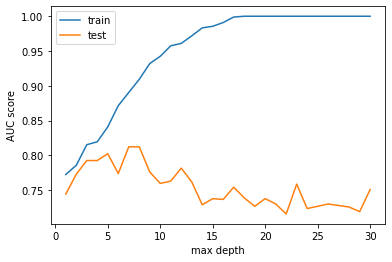

In [111]:
max_depths=range(1,31) #creating list of values to check

list_auc_train=[] #list to store results for train dataset 
list_auc_test=[] #list to store results for test dataset

#creating model and check result for each value of max depth
for max_depth in max_depths:
    decisiontree=DecisionTreeClassifier(max_depth=max_depth)
    decisiontree.fit(X_train,y_train)
    
    auc_train=prediction_auc(X_train,y_train)
    list_auc_train.append(auc_train)
    
    auc_test=prediction_auc(X_test,y_test)
    list_auc_test.append(auc_test)

#plotting results    
plotting(max_depths, 'max depth', list_auc_train, list_auc_test)

In [112]:
#buliding tree with max depth=4
decisiontree_depth_4=DecisionTreeClassifier(max_depth=4)
decisiontree_depth_4.fit(X_train,y_train)
y_pred=decisiontree_depth_4.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)

AUC score:  0.8001349527665318


In [113]:
# 3. Modifier les paramètres de l'arbre de décision (modifier au moins deux paramètres), 

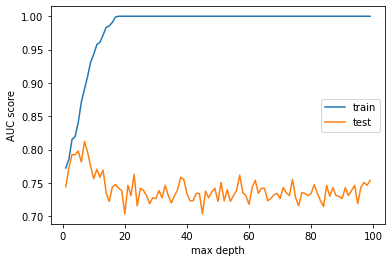

In [114]:
max_depths=range(1,100) #creating list of values to check

list_auc_train=[] #list to store results for train dataset 
list_auc_test=[] #list to store results for test dataset

#creating model and check result for each value of max depth
for max_depth in max_depths:
    decisiontree=DecisionTreeClassifier(max_depth=max_depth)
    decisiontree.fit(X_train,y_train)
    
    auc_train=prediction_auc(X_train,y_train)
    list_auc_train.append(auc_train)
    
    auc_test=prediction_auc(X_test,y_test)
    list_auc_test.append(auc_test)

#plotting results    
plotting(max_depths, 'max depth', list_auc_train, list_auc_test)

In [115]:
#buliding tree with max depth=4
decisiontree_depth_4=DecisionTreeClassifier(max_depth=4)
decisiontree_depth_4.fit(X_train,y_train)
y_pred=decisiontree_depth_4.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)

AUC score:  0.8001349527665318


In [116]:
# 4. Calculez la nouvelle précision et comparez-la avec les résultats précédents. 
# AUC score precedent == 0.7924426450742241 < AUC score modifie ===  0.8001349527665318

In [117]:
# 5. Utilisez une forêt aléatoire puis modifiez le nombre d'estimateurs

In [118]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

iris = datasets.load_iris()

data=pd.DataFrame({
'sepal length': iris.data[:,0],
'sepal width': iris.data[:,1],
'petal length': iris.data[:,2],
'petal width': iris.data[:,3], 
'species': iris.target
})

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] #features
y=data['species']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

In [119]:
# Prédiction de forêt aléatoire
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8888888888888888


In [120]:
# 6. Calculez la nouvelle précision et comparez-la avec le résultat précédent.

In [121]:
# Prédiction de forêt aléatoire
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.9333333333333333


In [ ]:
# Accuracy: 0.8888888888888888 < Accuracy: 0.9333333333333333